# 시퀀스 배열 - 순환 신경망(RNN)

## LSTM 로이터 뉴스 카테고리 분류

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
# 데이터 확인
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 단어 수
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [5]:
# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [7]:
# 모델 실행 옵션
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 11s 10ms/step - loss: 2.2019 - accuracy: 0.4362 - val_loss: 2.0478 - val_accuracy: 0.5134
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.7754 - accuracy: 0.5471 - val_loss: 1.6572 - val_accuracy: 0.5739
Epoch 3/200
450/450 [==============================] - 5s 10ms/step - loss: 1.5427 - accuracy: 0.6055 - val_loss: 1.5177 - val_accuracy: 0.6229
Epoch 4/200
450/450 [==============================] - 5s 10ms/step - loss: 1.3691 - accuracy: 0.6549 - val_loss: 1.4370 - val_accuracy: 0.6451
Epoch 5/200
450/450 [==============================] - 5s 11ms/step - loss: 1.2454 - accuracy: 0.6876 - val_loss: 1.2986 - val_accuracy: 0.6674
Epoch 6/200
450/450 [==============================] - 5s 10ms/step - loss: 1.1490 - accuracy: 0.7089 - val_loss: 1.2883 - val_accuracy: 0.6683
Epoch 7/200
450/450 [==============================] - 5s 11ms/step - loss: 1.0601 - accuracy: 0.7330 - val_loss: 1.2405 - val_accuracy:

In [9]:
# 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.1721 - accuracy: 0.7199

 Test Accuracy: 0.7199


In [10]:
# 오차 저장 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

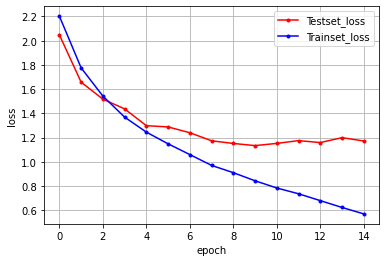

In [11]:
# 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그리드, 레이블 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## LSTM + CNN 조합 이용 : 영화 리뷰 분류

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 데이터셋 나누기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 1s 0us/step


In [14]:
# 단어 수
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [15]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [16]:
# 모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 12s 14ms/step - loss: 0.3965 - accuracy: 0.8084 - val_loss: 0.2870 - val_accuracy: 0.8795
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2367 - accuracy: 0.9073 - val_loss: 0.2596 - val_accuracy: 0.8915
Epoch 3/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1926 - accuracy: 0.9281 - val_loss: 0.2837 - val_accuracy: 0.8826
Epoch 4/100
469/469 [==============================] - 8s 18ms/step - loss: 0.1530 - accuracy: 0.9435 - val_loss: 0.2912 - val_accuracy: 0.8869
Epoch 5/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1226 - accuracy: 0.9571 - val_loss: 0.3122 - val_accuracy: 0.8838


In [18]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3297 - accuracy: 0.8771

 Test Accuracy: 0.8771


In [19]:
# 데이터셋 오차 저장 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

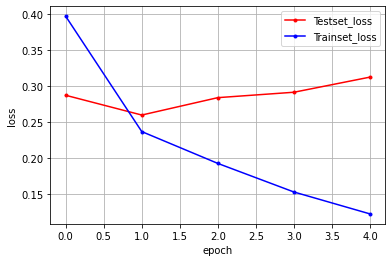

In [20]:
# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그리드, 레이블 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 어텐션 사용 신경망

In [21]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

In [23]:
# 데이터셋 나누기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [24]:
# 단어 수
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [25]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [26]:
# 모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [27]:
# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/100
625/625 [==============================] - 25s 37ms/step - loss: 0.3914 - accuracy: 0.8197 - val_loss: 0.2879 - val_accuracy: 0.8852
Epoch 2/100
625/625 [==============================] - 23s 37ms/step - loss: 0.2269 - accuracy: 0.9110 - val_loss: 0.3189 - val_accuracy: 0.8704
Epoch 3/100
625/625 [==============================] - 23s 36ms/step - loss: 0.1678 - accuracy: 0.9336 - val_loss: 0.3050 - val_accuracy: 0.8875
Epoch 4/100
625/625 [==============================] - 23s 37ms/step - loss: 0.1228 - accuracy: 0.9524 - val_loss: 0.3645 - val_accuracy: 0.8790


In [28]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 10s 12ms/step - loss: 0.3645 - accuracy: 0.8790

 Test Accuracy: 0.8790


In [29]:
# 데이터셋 오차 저장 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

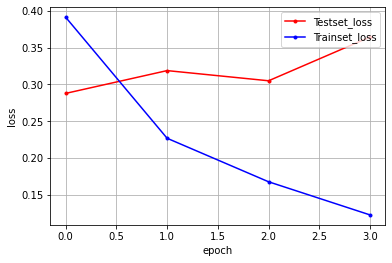

In [30]:
# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그리드, 레이블 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()